<img src="EO_Sounding_ATM_T_ProfileEX1.png"  width="50%" height="25%">

[Image source](https://c1.staticflickr.com/9/8353/8269759653_f261d12001_b.jpg)

# Purpose
## Objective
- Generate the atmospheric properties of the international standard atmosphere
- Calculate the absorption coefficient of CO$_2$ using the high-resolution transmission molecular absorption database. 
- Estimate the weighting functions of Schwarzschild’s equation for a few wavenumbers of the CO$_2$ absorption around 15 microns.


## Motivation
This  exercise serves the lecture **Seeing Thru Atmosphere! Retrieving atmospheric temperature profile from infrared satellite measurements** given by Suhyb Salama on the 7$^{th}$ of October 2022 at the [Vrij Universiteit Brussel<img src="http://www.etrovub.be/wp-content/uploads/2020/08/VUB-ETRO_RGB.png" width="10%" height="10%">](http://www.etrovub.be/)

## Credit

- The subroutine for computing the weighting functions of *Schwarzschild’s equation* is based on the book by *Clive Rodgers (2004): Inverse Methods for Atmospheric Sounding: Theory and Practice.*
- The [*ambiance 1.3.1 package*](https://pypi.org/project/ambiance/) is used to compute the atmospheric properties of the [International Standard Atmosphere](https://www.iso.org/standard/7472.html). The *Atmosphere* subroutine from *ambiance* will only calculate the pressure, temperature, density, and viscosity of the Earth's atmosphere up to 80km.
- The [HITRAN Application Programming Interface (HAPI)](https://doi.org/10.1016/j.jqsrt.2016.03.005) python package is used to access [HITRAN online database](www.hitran.org) of CO$_2$ absorption coefficient. *You should be a registered user to [HITRAN online database](www.hitran.org) with an generated API key to be able to use HAPI.*

## Folow up
The [HPI2: HITRAN2020 molecular spectroscopic database](https://doi.org/10.1016/j.jqsrt.2021.107949) python package will be used **instead of HAPI** to access [HITRAN online database](www.hitran.org) of the CO$_2$ absorption coefficient. HAPI2 package could be imported from [GitHub repository of HAPI2](https://github.com/hitranonline/hapi2).


**[Suhyb Salama](s.salama@utwente.nl)
ITC, University of Twente, the Netherlands**

*te Enschede
28-09-2022*



---------------------
### *Begin of Code:*
--------------------------

- Import [NumPy](https://numpy.org/) to carry out mathematical manipulation.
- From [*ambiance 1.3.1 package*](https://pypi.org/project/ambiance/) import the *Atmosphere* subroutine.
- Import [*hapi package*](https://github.com/hitranonline/hapi).
- Import [*matplotlib.pyplot*](https://matplotlib.org/) to carry out basic visualization.

In [1]:
import numpy as np
from ambiance import Atmosphere
#from hapi2 import *
from hapi import *
import matplotlib.pyplot as plt


HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

- The subroutine *Atmosphere* takes the height in meters as input argument, and create an atmosphere object that contains list of atmospheric properties, e.g. density, pressure and temperature, check the *ambiance package*()  for the complete list. 

In [2]:
# Create an atmosphere object
heights = np.linspace(0, 80e3, num=1000,retstep= True)
z = heights[0]
dz = heights[1]
atm = Atmosphere(z)

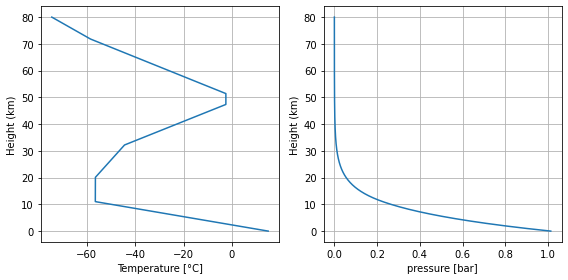

In [3]:
# Create an atmosphere object
heights = np.linspace(0, 80e3, num=1000,retstep= True)
z = heights[0]
dz = heights[1]
atm = Atmosphere(z)

# Make plot
figs, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(8,4))
axs[0].plot(atm.temperature_in_celsius, z/1000)

axs[0].set_xlabel('Temperature [°C]')

axs[1].plot(atm.pressure*1e-5, z/1000)

axs[1].set_xlabel('pressure [bar]')
for ax in axs:
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    ax.set_ylabel('Height (km)')
plt.tight_layout()
plt.show()

## Test the code with the 1D profile

## Transmittance
- Approximate the transmittance $\tau$ at wavenumber $\nu$ and pressure $p$ as: $$\tau(\nu,p)=\exp\left(-\frac{p}{p_m}\right)$$ See Rodgers (2004) page (9-10).
- This approximation is valid for uniformly mixed absorbers with, i.e. a constant mixing ratio and absorption coefficient which does not vary with temperature (e.g. CO$_2$) 
- $p$ is the pressure profile and $p_m$ is the pressure at which the uniformly mixed absorbers has the maximum absorption.
- Suppose that $p_m$ is between 10 and 40 km, at 10 km interval.

## Question: 
- **Estimate the weighting function of the emitting atmospheric layer assuming no surface emission.**


## Answer

- Retrieve HITRAN table for the $^{12}C ^{16}O_2$ species at wavenumbres between $\nu=667$cm$^{-1}$ and $\nu=670$ cm$^{-1}$

In [4]:
startnu = 666
endnu   = 670
fetch('CO2',2,1,startnu,endnu)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
Header written to ./CO2.header
END DOWNLOAD
                     Lines parsed: 716
PROCESSED


- Use the function *absorptionCoefficient_Lorentz* to compute the absorption coefficient cross section using the Lorentz profile
- The function *absorptionCoefficient_Lorentz* takes the retrieved CO$_2$ table, pressure and temperature as input arguments. Setting the keyword 
*HITRAN_units=False* will return the absorption coefficient in cm$^{-1}$.


In [5]:
pn = atm.pressure/max(atm.pressure)
tk = atm.temperature
zsize = pn.size

nu ,coef0 = absorptionCoefficient_Lorentz(SourceTables = 'CO2',HITRAN_units=False,Environment = {'p':pn[0],'T':tk[0]})
nusize = nu.size
coef = np.empty((nusize,zsize), dtype=float)
coef[:,0] = coef0
for iz in range(1,zsize):
    nu0,coef1 = absorptionCoefficient_Lorentz(SourceTables = 'CO2',HITRAN_units=False,Environment = {'p':pn[iz],'T':tk[iz]})
    coef[:,iz] = coef1
 

{'air': 1.0}
0.157012 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.149760 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.147163 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.155194 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.135293 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.155830 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.135916 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.161603 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.139818 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.141315 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.178519 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.159227 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.147444 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.153014 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.141064 seconds elapsed for abscoef; nlines = 716
{'air': 1.0}
0.150116 seconds elapsed fo

- Let us calculate the absorption and transmittance spectra on the basis of absorption coefficient using the HAPI functions *absorptionSpectrum* and *transmittanceSpectrum* respectively.

In [61]:
trans = np.empty((nusize,zsize), dtype=float)
absorp = np.empty((nusize,zsize), dtype=float)
for iz in range(zsize):
    nu0,absorp[:,iz] = absorptionSpectrum(nu,coef[:,iz])
    nu0,trans[:,iz] = transmittanceSpectrum(nu,coef[:,iz])


- **You can (and should) convolve the HITRAN results with the satellite bands' spectral response functions. For this exercise will skip this step.**

The Schwarzschild’s equation is written as:
$$R_{ToA}=R_{s}\times\tau_a +\int^{z}_{z_0}B(\nu,T)\frac{\mathrm{d}\tau(\nu,z)}{\mathrm{d}z}\mathrm{d}z$$

Where:
- $R_{ToA}$is the observed radiance at the Top of the Atmosphere (ToA).
- $R_{s}$ is the radiance emitted by the Earth's surface.
- $\tau_a $ is the total transmittance of the atmosphere, from Earth's surface to ToA.
- $B(\nu,T)$ is the Planck function at temperature $T$ and wavenumber $\nu$.

The weighting function is $K(\nu,z)=\frac{\mathrm{d}\tau(\nu,z)}{ \mathrm{d}z}$ with $\sum K(\nu,z)\mathrm{d}z=1$, which you can use to check your results.

Using the hydrostatic equation the transmittance becomes function of pressure rather than height and can be approximated as $\tau(\nu,p)=\exp\left(-\frac{p}{p_m}\right)$. 
The transmittance can now be differentiated with respect to pressure as :
$\mathrm{d}\tau(\nu,p)=-\frac{1}{p_m} \exp\left(-\frac{p}{p_m}\right)\mathrm{d}p$
Therefor we will have:  

$$K(\nu,p)=-\frac{1}{p_m} \exp\left(-\frac{p}{p_m}\right)$$

- For each wavenumber identify the heights where the absorption is maximum

In [103]:
zm0=np.empty((nusize), dtype=float)

for iband in range(nusize):
    grad_absorper = np.abs(np.gradient(absorp[iband,:]))
    index_min = np.argmax(grad_absorper)
    zm0[iband]=np.round(z[index_min],3)


- From this long list of *zm*  and wavenumbers select the three percentiles [0,25,50].

In [140]:
percen=[0,25,50]
zm = np.percentile(zm0,percen)
i_near=np.empty(len(percen), dtype=int)
for i,zmm in enumerate(zm):
    i_near[i]=abs(zmm-zm0).argmin()
zmperc =zm0[i_near]
numperc=nu[i_near]

- Compute the pressure ($p_m$) at which the uniformly mixed absorbers has the maximum absorption.

In [141]:
atm0 = Atmosphere(zmperc)

- The function * getweights* computes the weighting functions of the Schwarzschild’s equation.
- The function * getweights* takes *Atmosphere* object from the [*ambiance 1.3.1 package*](https://pypi.org/project/ambiance/) and the pressure vector $p_m$, $\mathrm{d}p$ and $\mathrm{d}z$  as input arguments and return the transmittance and the weights for each value in $p_m$. 
- The weights are estimated with respect to height $K(\nu,z)$ and pressure $K(\nu,p)$ to do a check if they are the same.
- In this example the values of $p_m$ correspond to different wavenumbers.


In [142]:
def getweights(atm,pm,dz):
    p = atm.pressure
    dz2dp = -atm.density*atm.grav_accel
    m = p.size
    n = pm.size
    wsp = np.empty((m,n), dtype=float)
    ws = np.empty((m,n), dtype=float)
    tau = np.empty((m,n), dtype=float)
    
    for i, ipm in enumerate(pm):
        tau[:,i]=np.exp(-p/ipm)
        wsp[:,i] = -1/ipm*np.exp(-p/ipm)*dz2dp
        ws[:,i] = np.gradient(tau[:,i])/dz
              
    return tau,wsp,ws

In [143]:
tau,wsp,ws = getweights(atm, atm0.pressure,dz)

-  Plot the transmittance and the weighting functions of the selected percentiles

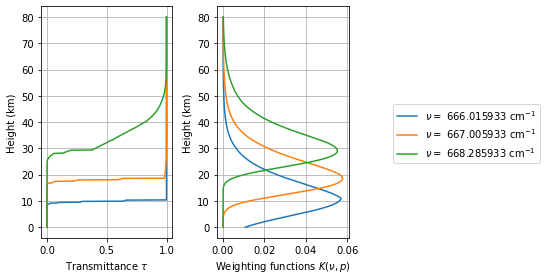

In [147]:
figs, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(8,4))

axs[0].plot(trans[i_near,:].T,z/1000)
axs[0].set_xlabel(r"Transmittance $\tau$")

axs[1].plot(ws*1e3,z/1000)
axs[1].set_xlabel(r"Weighting functions $K(\nu,p)$")

for ax in axs:
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    ax.set_ylabel('Height (km)')
leg= []

for iband in i_near:
    leg.append(r'$\nu=$'+' '+str(nu[iband]) +' '+ 'cm$^{-1}$')#
    
axs[1].legend(leg,bbox_to_anchor=(1.3, 0.6))
plt.tight_layout()
plt.show()

---------------------
### *End of Code.*
---------------------

# Main conclusions of this exercise
- IR sensors on earth-orbiting satellites can retrieve (at most) one piece of temperature data per channel. 
- The derived temperature is the average brightness temperature weighted over the depth of the weighting function.


-----
# END of the notebook.
------
------